In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [9]:
# Load the dataset from the CSV file
df = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check the first few rows of the dataframe
df.head()


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Resample the data by month and sum the total amounts
df_monthly = df.resample('M').sum()

# Check the resampled data
df_monthly.head()


<ipython-input-3-655a997f886f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-01-31,36867,CUST180CUST522CUST559CUST163CUST303CUST421CUST...,MaleMaleFemaleFemaleMaleFemaleFemaleFemaleMale...,3028,ClothingBeautyClothingClothingElectronicsCloth...,195,14115,35450
2023-02-28,37699,CUST269CUST320CUST673CUST142CUST223CUST666CUST...,MaleFemaleFemaleMaleFemaleMaleFemaleMaleFemale...,3320,ClothingElectronicsClothingElectronicsClothing...,214,16255,44060
2023-03-31,34712,CUST399CUST500CUST514CUST947CUST220CUST339CUST...,FemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFe...,3111,BeautyBeautyElectronicsBeautyBeautyElectronics...,194,12620,28990
2023-04-30,42755,CUST462CUST614CUST808CUST166CUST465CUST502CUST...,MaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFe...,3652,ElectronicsBeautyBeautyClothingElectronicsElec...,214,12715,33870
2023-05-31,53821,CUST337CUST585CUST652CUST242CUST293CUST460CUST...,MaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMale...,4455,ClothingClothingBeautyClothingElectronicsBeaut...,259,21255,53150


In [4]:
# Fit ARIMA model (example order (5,1,0), you can experiment with different orders)
model = ARIMA(df_monthly['Total Amount'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the ARIMA model
model_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Total Amount   No. Observations:                   13
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -133.546
Date:                Wed, 20 Nov 2024   AIC                            279.091
Time:                        04:17:23   BIC                            282.001
Sample:                    01-31-2023   HQIC                           278.014
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2882      1.114     -1.156      0.248      -3.472       0.895
ar.L2         -1.0387      0.913     -1.138      0.255      -2.828       0.751
ar.L3         -0.7263      0.853     -0.852      0.394      -2.398       0.945
ar.L4         -0.1740      0.878     -0.198      0.843      -1.894       1.546
ar.L5         -0.1966      0.739     -0.266      0.790      -1.646       1.253
sigma2       2.42e+08   6.39e-09   3.79e+16      0.000    2.42e+08    2.42e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.91   Prob(JB):                         0.84
Heteroskedasticity (H):               0.65   Skew:                            -0.41
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.82e+32. Standard errors may be unstable.
"""

<ipython-input-5-c7153e21569b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df_monthly.index[-1] + pd.Timedelta(days=1), periods=6, freq='M')


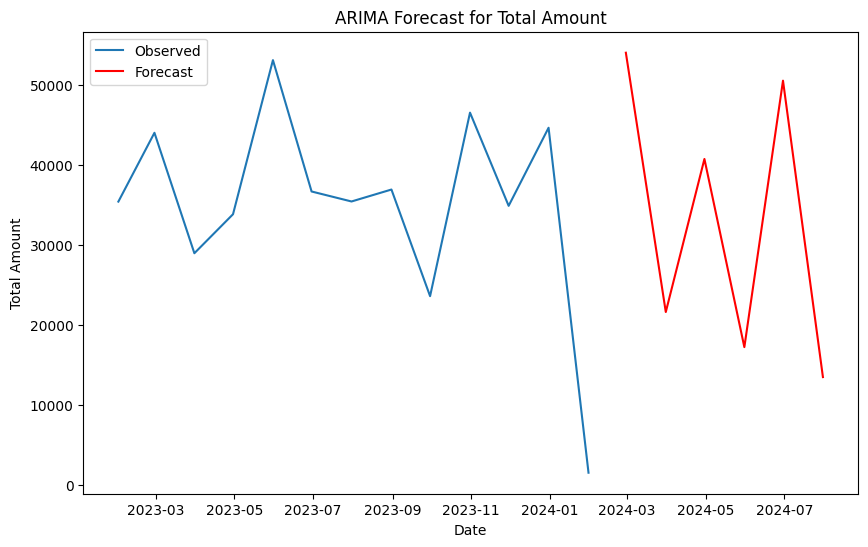

In [5]:
# Forecast the next 6 months
forecast = model_fit.forecast(steps=6)

# Create the index for the forecasted months
forecast_index = pd.date_range(df_monthly.index[-1] + pd.Timedelta(days=1), periods=6, freq='M')

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Total Amount'], label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


In [6]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly['Total Amount'][:train_size], df_monthly['Total Amount'][train_size:]

# Check the split
train.head(), test.head()


(Date
 2023-01-31    35450
 2023-02-28    44060
 2023-03-31    28990
 2023-04-30    33870
 2023-05-31    53150
 Freq: ME, Name: Total Amount, dtype: int64,
 Date
 2023-11-30    34920
 2023-12-31    44690
 2024-01-31     1530
 Freq: ME, Name: Total Amount, dtype: int64)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


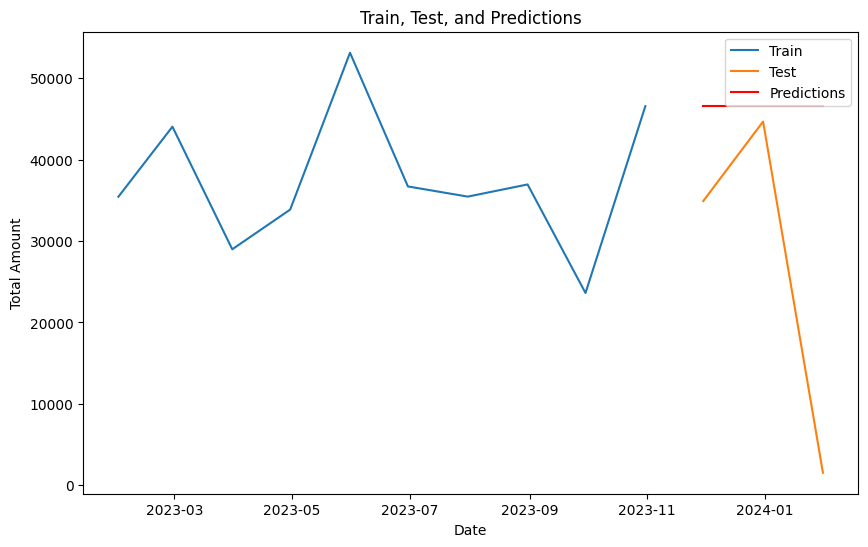

In [7]:
# Fit the ARIMA model again on the training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast on the test data
predictions = model_fit.forecast(steps=len(test))

# Visualize the predictions vs the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Train, Test, and Predictions')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


In [8]:
# Calculate RMSE and MAE for the model's performance
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 26888.852416767364
MAE: 19533.341262274782
